<h1> RSNA 2022 Cervical Spine Fracture Detection </h1>

---

In [66]:
#@title
from IPython.display import Video, Image, HTML, display

image_path1 = "https://innerbody.imgix.net/cervical_vertebrae.png"
image_path2 = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Cervical_Spine_Anterior_View.png/1024px-Cervical_Spine_Anterior_View.png"
image_path3 = "https://o.quizlet.com/37toD9uBRyPe.O9dczpY5A_b.jpg"


HTML(f"""
    <div class="row" style="display: flex;">
            <img src={image_path1} style="height:300px; margin: auto;"> </img>
            <img src={image_path2} style="height:300px; margin: auto;"> </img>
            <img src={image_path3} style="height:300px; margin: auto;"> </img>

    </div>
    """)

---

<h1> Table of Contents </h1>

>[1 Introduction](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=AENFL95Y8odN)

>>[1.1 About This Project](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=mSxKmAy18oWJ)

>>[1.2 About the Dataset](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=2szP8O5B9QMP)

>>[1.3 About This Notebook](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=fxYFgcah9QE2)

>[2 Data Overview](#updateTitle=true&folderId=1EKF_3rqNbEcDMSevUKbru8-1wvuJV5Mk&scrollTo=hLN3QZye9P87)



---

# 1 Introduction

- Every year, around the world, between **250 000** and **500 000** people suffer a spinal cord injury (SCI).

- The majority of spinal cord injuries are due to preventable causes such as road traffic crashes, falls or violence.

- People with a spinal cord injury are **two** to **five** times more likely to die prematurely than people without a spinal cord injury, with worse survival rates in low- and middle-income countries.

- Spinal cord injury is associated with lower rates of school enrollment and economic participation, and it carries substantial individual and societal costs.

- Spinal cord injury is associated with a risk of developing secondary conditions that can be debilitating and even life-threatening—e.g. deep vein thrombosis, urinary tract infections, muscle spasms, osteoporosis, pressure ulcers, chronic pain, and respiratory complications. Acute care, rehabilitation services and ongoing health maintenance are essential for prevention and management of these conditions.

---
**Spinal Cord Scans**

Because scans rely on precision for creating sharp results, any movement can produce blurred results. You must carefully control your breathing as directed during the procedure. If you need images of a part of the body not in your thoracic region, you may be freer with your breath, but you will need to remain completely still for the scan. So it is hard to sustain reliable results by bare eye.it needs a professional Radiologists ot get such data.

## 1.1 About This Project

In this project we will look closely into how to detect cervical spine fractures
with a deep learing model to help diagnose victims faster to avoid permanent injuries or death.

Finally, we use deep learing models in order to automate cervical spine fracture detection. 

An immediate application on this is early detection of cervical spine fracture in hospitals, thus enabling proactive measurements instead of reactive. Therefore, the goal of the project is to draw statistical insights, and construct a real world application for the dataset.

## 1.2 About the Dataset

The Dataset is collected imaging data sourced from twelve sites on six continents, including approximately 3,000 CT studies. Spine radiology specialists from the ASNR and ASSR provided expert image level annotations these studies to indicate the presence, vertebral level and location of any cervical spine fractures.

## 1.3 About This Notebook

This Notebook is concerned with exploring the data, the cervical spine fracture, and the patterns and insights hidden inside the data. We will visualize the data in various ways in our exploration.

In [67]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import cv2
import os
from os import listdir
import re
import gc
from tqdm import tqdm
from pprint import pprint
from time import time
import itertools
from skimage import measure 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import nibabel as nib
from glob import glob
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 2 Data Overview <a class="anchor" id="overview"></a>

In [68]:
#@title
! pip install -q kaggle

In [69]:
#@title
from google.colab import files

In [70]:
#@title
files.upload()

{}

In [71]:
#@title
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [72]:
#@title
! cp kaggle.json ~/.kaggle/

In [73]:
#@title
! chmod 600 ~/.kaggle/kaggle.json

In [74]:
#@title
!kaggle datasets list -s dogs

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jessicali9530/stanford-dogs-dataset                        Stanford Dogs Dataset                               750MB  2019-11-13 06:20:35          31284        866  0.75             
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dogs                                        788MB  2020-03-12 05:34:30          15673        233  0.875            
d4rklucif3r/cat-and-dogs                                   Cat & Dogs                                          218MB  2021-06-07 11:39:13           1701         54  0.875            
chetankv/dogs-cats-images                                  Dogs & Cats Images        

In [75]:
#@title
import os

os.environ['KAGGLE_USERNAME'] = "mohamedsalemmohamed"
os.environ['KAGGLE_KEY'] = "5960caf345fa85c43e6aa91425635ec8"

!kaggle datasets download -d awsaf49/rsna-csfd-256x256-jpg-dataset

  0% 46.0M/16.6G [00:03<18:29, 16.0MB/s]
User cancelled operation
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/_monitor.py", line 44, in exit
    self.join()
  File "/usr/lib/python3.7/threading.py", line 1044, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.7/threading.py", line 1060, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt


In [76]:
#@title
! mkdir train

mkdir: cannot create directory ‘train’: File exists


In [77]:
#@title
! unzip rsna-csfd-256x256-jpg-dataset.zip -d train

Archive:  rsna-csfd-256x256-jpg-dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of rsna-csfd-256x256-jpg-dataset.zip or
        rsna-csfd-256x256-jpg-dataset.zip.zip, and cannot find rsna-csfd-256x256-jpg-dataset.zip.ZIP, period.


In [78]:
# Load metadata
train_data = pd.read_csv("/content/train/train.csv")
test_data = pd.read_csv("/content/train/test.csv")
ss = pd.read_csv("/content/train/sample_submission.csv")

# Print dataframe shapes
print('train shape:', train_data.shape)
print('test shape:', test_data.shape)
print('ss shape:', ss.shape)

train shape: (711601, 13)
test shape: (1318, 7)
ss shape: (3, 2)


In [79]:
train_data

,slice_path,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id,width,height
0,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,12,512,512
1,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,210,512,512
2,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,120,512,512
3,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,208,512,512
4,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,141,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711596,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.30741,0,0,0,0,0,0,0,0,221,512,512
711597,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.30741,0,0,0,0,0,0,0,0,13,512,512
711598,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.30741,0,0,0,0,0,0,0,0,358,512,512
711599,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.30741,0,0,0,0,0,0,0,0,566,512,512


In [80]:
print(train_data.info(), end='\n\n')
print(test_data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711601 entries, 0 to 711600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   slice_path        711601 non-null  object
 1   StudyInstanceUID  711601 non-null  object
 2   patient_overall   711601 non-null  int64 
 3   C1                711601 non-null  int64 
 4   C2                711601 non-null  int64 
 5   C3                711601 non-null  int64 
 6   C4                711601 non-null  int64 
 7   C5                711601 non-null  int64 
 8   C6                711601 non-null  int64 
 9   C7                711601 non-null  int64 
 10  slice_id          711601 non-null  int64 
 11  width             711601 non-null  int64 
 12  height            711601 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 70.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column         

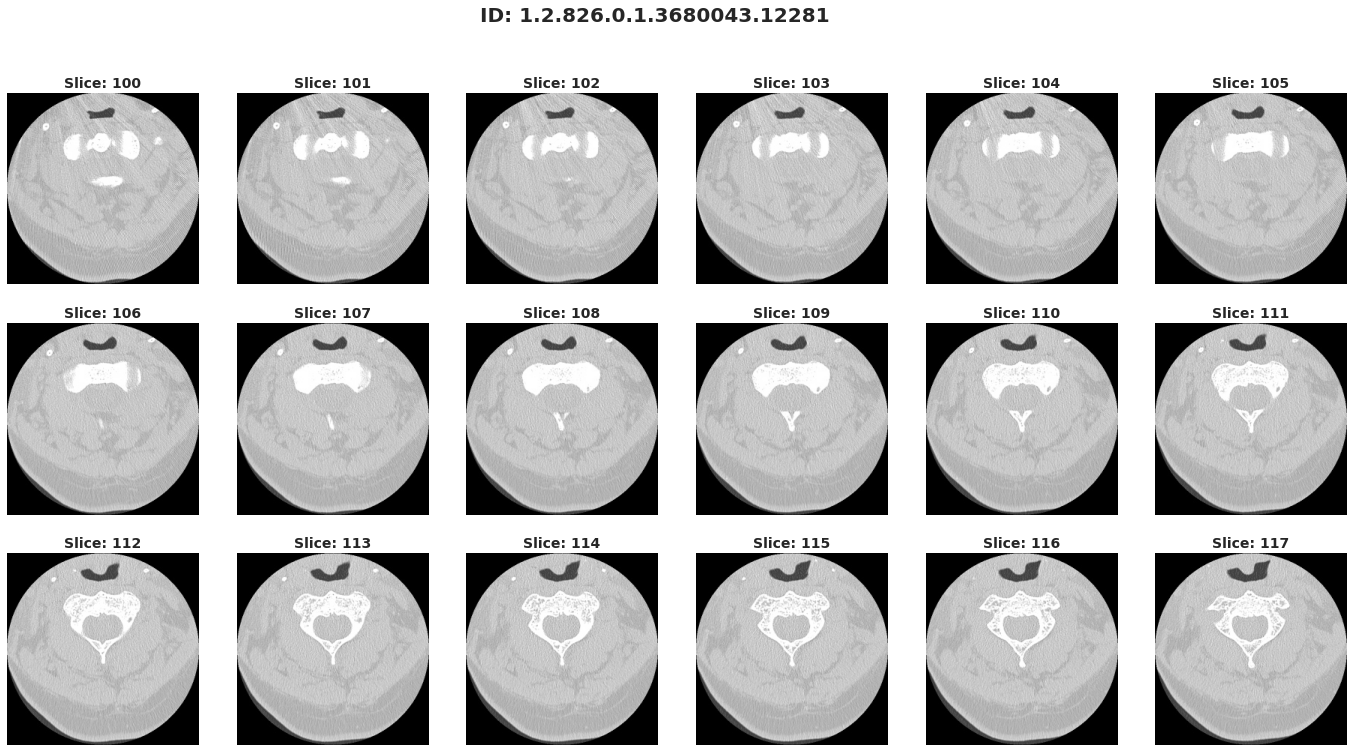

In [81]:
base_path = "/content/train"
patient_id = '1.2.826.0.1.3680043.12281'
imgs_paths = glob(f"{base_path}/train_images/{patient_id}/*")
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]
imgs_paths.sort(key=natural_keys)

images = [cv2.imread(path) for path in imgs_paths]
# Plot images
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24,12))
fig.suptitle(f'ID: {patient_id}', weight="bold", size=20)

start = 100
for i in range(start,start+18):
    img = images[i]
    slice_no = i

    # Plot the image
    x = (i-start) // 6
    y = (i-start) % 6

    axes[x, y].imshow(img, cmap="bone")
    axes[x, y].set_title(f"Slice: {slice_no}", fontsize=14, weight='bold')
    axes[x, y].axis('off')

In [82]:
train_data.set_index('StudyInstanceUID', inplace=True)

In [83]:
new_train_data = train_data.loc[os.listdir('/content/train/train_images/'),:].reset_index()
new_train_data

,StudyInstanceUID,slice_path,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id,width,height
0,1.2.826.0.1.3680043.1291,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,257,512,512
1,1.2.826.0.1.3680043.1291,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,240,512,512
2,1.2.826.0.1.3680043.1291,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,317,512,512
3,1.2.826.0.1.3680043.1291,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,12,512,512
4,1.2.826.0.1.3680043.1291,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,323,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711596,1.2.826.0.1.3680043.7791,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,26,512,512
711597,1.2.826.0.1.3680043.7791,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,185,512,512
711598,1.2.826.0.1.3680043.7791,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,221,512,512
711599,1.2.826.0.1.3680043.7791,../input/rsna-2022-cervical-spine-fracture-det...,0,0,0,0,0,0,0,0,13,512,512


In [84]:
train_data["slice_path"] = train_data.slice_path.str.replace("../input/rsna-2022-cervical-spine-fracture-detection", "/content/train")
train_data["slice_path"] = train_data.slice_path.str.replace("dcm", "jpg")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [85]:
train_data["slice_path"][0]

'/content/train/train_images/1.2.826.0.1.3680043.17625/12.jpg'

In [86]:
train_data.rename(columns = {'slice_path':'imgs_paths'}, inplace = True)

In [87]:
train_data

,imgs_paths,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id,width,height
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.17625,/content/train/train_images/1.2.826.0.1.368004...,1,0,1,0,0,0,0,0,12,512,512
1.2.826.0.1.3680043.17625,/content/train/train_images/1.2.826.0.1.368004...,1,0,1,0,0,0,0,0,210,512,512
1.2.826.0.1.3680043.17625,/content/train/train_images/1.2.826.0.1.368004...,1,0,1,0,0,0,0,0,120,512,512
1.2.826.0.1.3680043.17625,/content/train/train_images/1.2.826.0.1.368004...,1,0,1,0,0,0,0,0,208,512,512
1.2.826.0.1.3680043.17625,/content/train/train_images/1.2.826.0.1.368004...,1,0,1,0,0,0,0,0,141,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...
1.2.826.0.1.3680043.30741,/content/train/train_images/1.2.826.0.1.368004...,0,0,0,0,0,0,0,0,221,512,512
1.2.826.0.1.3680043.30741,/content/train/train_images/1.2.826.0.1.368004...,0,0,0,0,0,0,0,0,13,512,512
1.2.826.0.1.3680043.30741,/content/train/train_images/1.2.826.0.1.368004...,0,0,0,0,0,0,0,0,358,512,512


In [88]:
final_df = train_data

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
final_train, final_valid = train_test_split(final_df, test_size=0.2, random_state=42, stratify=final_df[['patient_overall','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']])

In [90]:
print(f'Training shape : {len(final_train)} rows')
print(f'Validation shape : {len(final_valid)} rows')

Training shape : 569280 rows
Validation shape : 142321 rows


In [91]:
final_train.columns[3:10]

Index(['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'slice_id'], dtype='object')

In [95]:
import keras.applications
from keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()

model.add(ResNet50(include_top = False, pooling = 'avg'))

model.add(Dense(7, activation = 'softmax'))

model.layers[0].trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [126]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['mae', 'accuracy'])

In [130]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 256

data_generator = ImageDataGenerator(rescale=1/255.0)

train_generator = data_generator.flow_from_dataframe(dataframe=final_train,
        x_col='imgs_paths',
        y_col= list(final_train.columns[3:10]),
        target_size=(256, 256),
        shuffle=True,
        batch_size=16,
        validate_filenames=False,
        class_mode='raw')

validation_generator = data_generator.flow_from_dataframe(dataframe=final_valid,
        x_col='imgs_paths',
        y_col= list(final_valid.columns[3:10]),
        target_size=(256, 256),
        shuffle=True,
        batch_size=16,
        validate_filenames=False,
        class_mode='raw')

Found 569280 non-validated image filenames.
Found 142321 non-validated image filenames.


In [ ]:
fit_history = model.fit(
        train_generator,
        steps_per_epoch=1000,
        epochs = 10,
        validation_data=validation_generator,
        validation_steps=10)

Epoch 1/10
1000/1000 [==============================] - 602s 598ms/step - loss: 1246.6558 - mae: 28.5270 - accuracy: 0.9984 - val_loss: 1296.6606 - val_mae: 28.7663 - val_accuracy: 0.9987
Epoch 2/10
1000/1000 [==============================] - 643s 643ms/step - loss: 1327.9575 - mae: 28.6558 - accuracy: 0.9989 - val_loss: 1429.3191 - val_mae: 28.8852 - val_accuracy: 0.9988
Epoch 3/10
1000/1000 [==============================] - 598s 599ms/step - loss: 1485.3954 - mae: 28.8137 - accuracy: 0.9987 - val_loss: 1561.1907 - val_mae: 28.7105 - val_accuracy: 0.9986
Epoch 4/10
1000/1000 [==============================] - 598s 598ms/step - loss: 1666.7532 - mae: 28.3827 - accuracy: 0.9987 - val_loss: 1691.2950 - val_mae: 28.8374 - val_accuracy: 0.9987
Epoch 5/10
1000/1000 [==============================] - 596s 596ms/step - loss: 1783.8218 - mae: 28.7951 - accuracy: 0.9991 - val_loss: 1827.6067 - val_mae: 28.8272 - val_accuracy: 0.9987
Epoch 6/10
1000/1000 [==============================] - ETA:

In [ ]:
model.load_weights("./best.hdf5")